## Списки

Вам дан список. Создайте новый список, в котором порядок следования элементов будет обратным относительно исходного списка.

In [54]:
a = [1, 2, 3, 4, 5, 6, 7]
a[::-1]

[7, 6, 5, 4, 3, 2, 1]

Вам дан список. Создайте новый список, в котором будут присутствовать только чётные элементы исходного списка.

In [55]:
print(a[::2]) # с чётными индексами
b = list(filter(lambda s: s%2 == 0, a))
print(b) # чётные

[1, 3, 5, 7]
[2, 4, 6]


## Генераторы

Вам дан список. Создайте новый список, который удвоит каждый элемент исходного списка.

In [56]:
print([i*2 for i in a])

[2, 4, 6, 8, 10, 12, 14]


Вам дан список. Создайте новый список, который увеличит на треть элемент исходного списка.

In [57]:
print([i*4/3 for i in a])

[1.3333333333333333, 2.6666666666666665, 4.0, 5.333333333333333, 6.666666666666667, 8.0, 9.333333333333334]


## Встроенные функции

Вам дана строка. Выведите ascii-код максимального элемента в строке.

In [58]:
s = 'ABabG'
print(ord(max(s)))

98


Вам дана строка. Преобразуйте её в кортежи, состоящие из пары – порядковый номер элемента строки, ascii-код элемента.

In [74]:
d = enumerate(s)
e = [(i, ord(x)) for i, x in d]
print(e)

[(0, 65), (1, 66), (2, 97), (3, 98), (4, 71)]


## NumPy

Создайте многомерный массив, посчитайте суммы элементов по различным осям.

In [60]:
import numpy as np
a = np.array(range(8)).reshape(2, 2, 2)
print(a.sum(axis=0))
print(a.sum(axis=1))
print(a.sum(axis=2))



[[ 4  6]
 [ 8 10]]
[[ 2  4]
 [10 12]]
[[ 1  5]
 [ 9 13]]


Дан массив A (numpy.array()), заполненный 1.
Дан массив I (numpy.array()) индексов.

Прибавьте к каждому значению массиву A по массиву индексов +1.

In [61]:
import numpy as np

n = 10
k = 12
A = np.ones(n)
I = np.random.randint(0,len(A),k)
print(I)

def plusI(arr):
  for i in list(I):
    arr[i]+=1
  return arr
print(plusI(A))
# ваше решение

[7 9 7 0 5 1 1 5 3 2 1 2]
[2. 4. 3. 2. 1. 3. 1. 3. 1. 2.]


## Pandas

https://www.kaggle.com/datasets/vinesmsuic/star-categorization-giants-and-dwarfs

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Постройте гистаграмму переменной `Target`.
- Постройте heatmap для матрицы корреляции переменных в датасете.
- Постройте pairplot для всех переменных
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Посчитайте различные статестические показатели (среднее, медиана, максимум, минимум) для различных классов *(т.е. отдельно какие показатели у класса 0, какие у класса 1)*.
- Проанализируйте колонку `SpType`. Подсчитаете количество звёзд относящихся к различным классам.
`SpType` - спектральный класс звезды согласно классификации Моргана-Кинана.

# Первые 3

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Star3642_balanced.csv')

print(df.dtypes.unique()) # уникальные типы
print(df.head())

[dtype('float64') dtype('O') dtype('int64')]
   Vmag    Plx  e_Plx    B-V SpType       Amag  TargetClass
0  5.99  13.73   0.58  1.318  K5III  16.678352            0
1  8.70   2.31   1.29 -0.045   B1II  15.518060            0
2  5.77   5.50   1.03  0.855  G5III  14.471813            0
3  6.72   5.26   0.74 -0.015    B7V  15.324928            1
4  8.76  13.44   1.16  0.584    G0V  19.401997            1


In [63]:
print(df.isnull().sum()) # нет пропущенных данных

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64


(array([1821.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1821.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

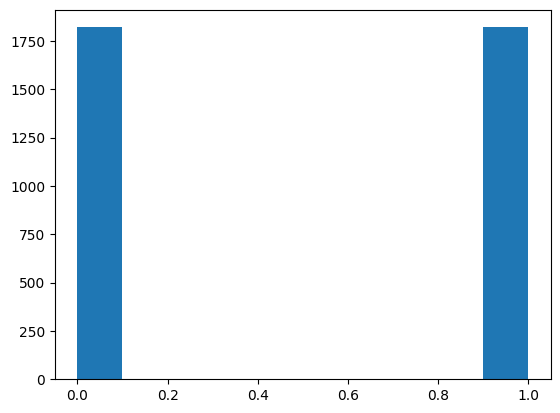

In [64]:
fig, ax = plt.subplots()

ax.hist(df['TargetClass']) # гистограмма

# heatmap and pairplot

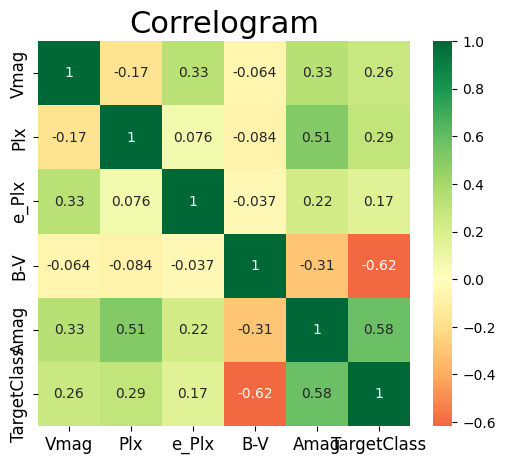

In [65]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(numeric_only=True), xticklabels=df.corr(numeric_only=True).columns, yticklabels=df.corr(numeric_only=True).columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 1000x800 with 0 Axes>

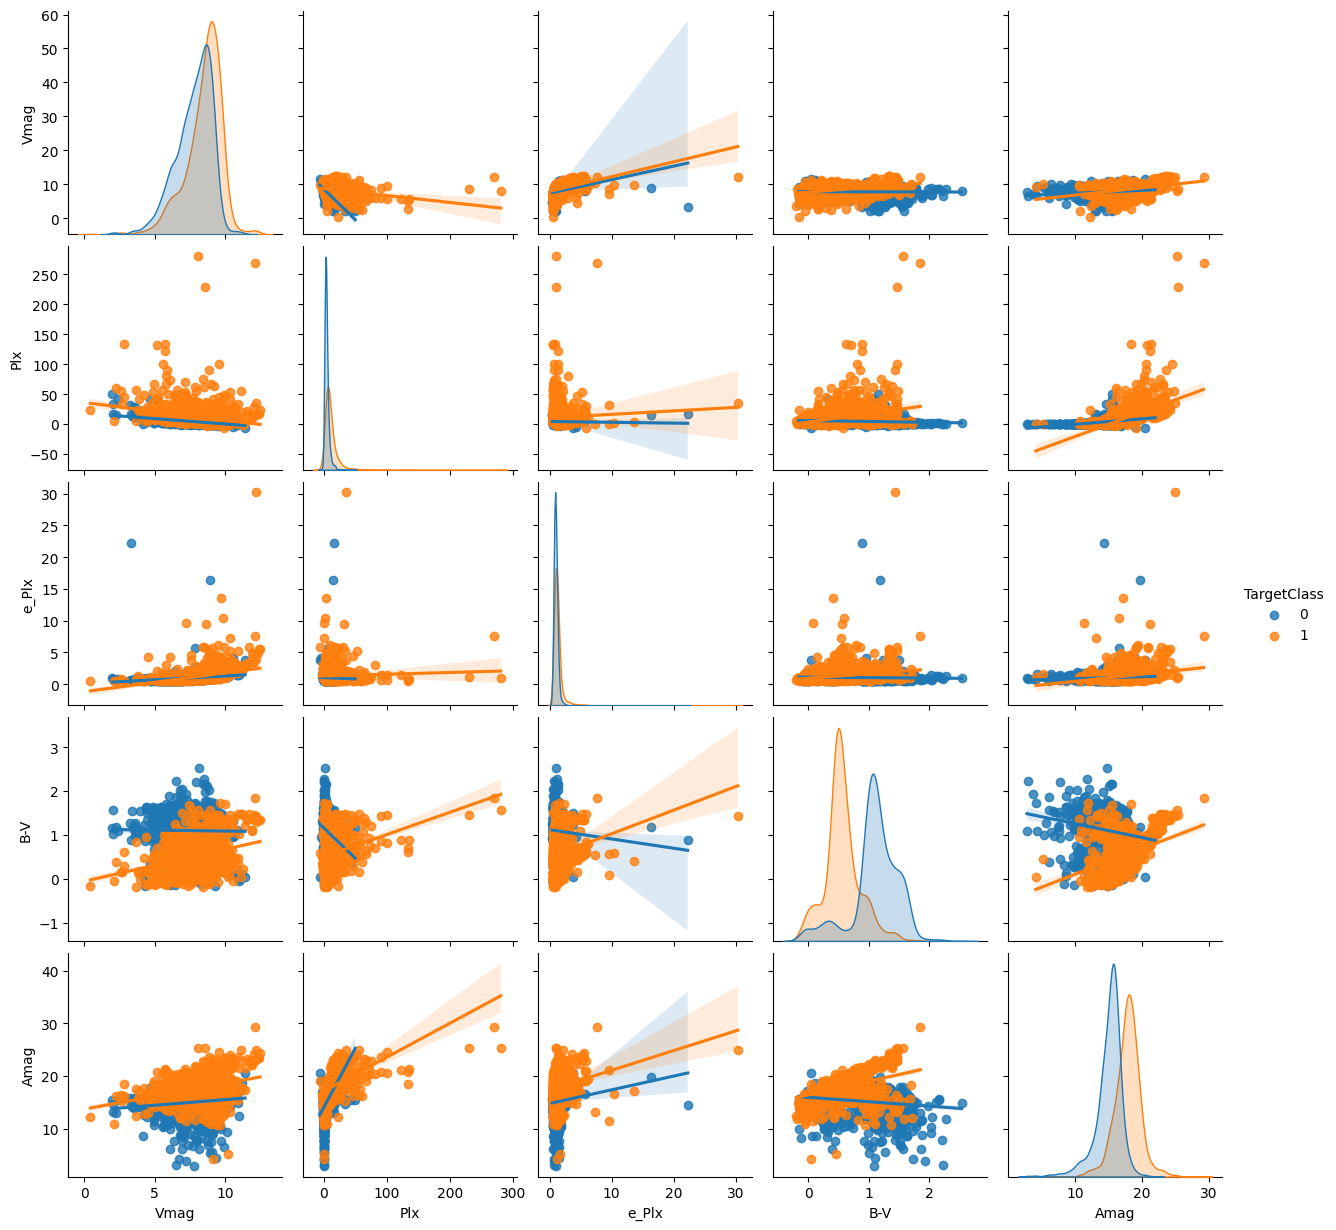

In [66]:
plt.figure(figsize=(10,8))
sns.pairplot(df, kind="reg", hue="TargetClass")
plt.show()

# Box

       Vmag    Plx  e_Plx    B-V    SpType       Amag  TargetClass
21     4.83  35.33   0.82  0.421      F5IV  17.570717            1
128    4.34  23.73   0.68  0.170    A7Vvar  16.216488            1
172    3.99  10.84   0.79  1.554  K5/M0III  14.165147            0
208    0.45  22.68   0.57 -0.158      B3Vp  12.228215            1
210    2.40  42.14   0.78  1.083  K0III...  15.523474            0
...     ...    ...    ...    ...       ...        ...          ...
3483  12.31  18.80   4.99  1.336      M0V:  23.680790            1
3587   8.81   0.20   1.44  1.148  K1/K2III  10.315150            0
3593   9.38   0.15   1.86  0.580    G8III:  10.260457            0
3605   7.28   0.44   0.75  0.637      A1Ia  10.497263            0
3634  12.49  22.93   5.47  1.340      M0V:  24.292019            1

[675 rows x 7 columns]


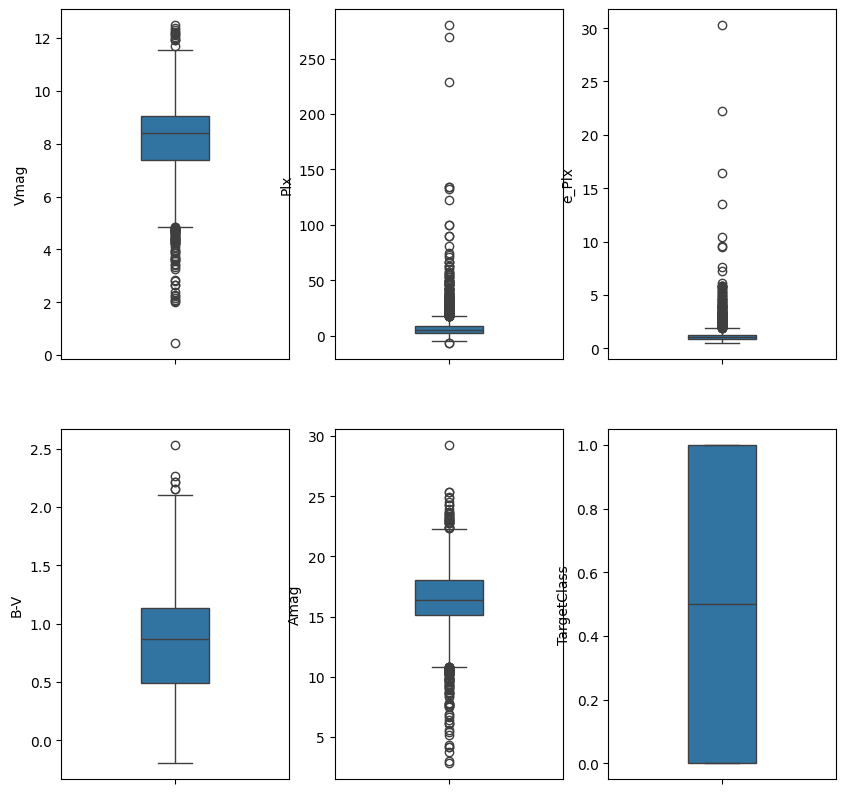

In [67]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))

sns.boxplot(df['Vmag'], ax=axes[0][0], width=0.3)
sns.boxplot(df['Plx'], ax=axes[0][1], width=0.3)
sns.boxplot(df['e_Plx'], ax=axes[0][2], width=0.3)
sns.boxplot(df['B-V'], ax=axes[1][0], width=0.3)
sns.boxplot(df['Amag'], ax=axes[1][1], width=0.3)
sns.boxplot(df['TargetClass'], ax=axes[1][2], width=0.3)

a = ['Vmag', 'Plx', 'e_Plx', 'B-V', 'Amag']
outliers = []
for column in a:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # print(Q1, Q3, IQR)
    # print((Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR))
    outliers.append(df.loc[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))])
print(pd.concat(outliers))

# различные показатели

In [68]:
df0 = df.loc[df['TargetClass']==0].drop(columns='TargetClass')
df1 = df.loc[df['TargetClass']==1].drop(columns='TargetClass')
print(df0.describe())
print(df1.describe())

              Vmag          Plx        e_Plx          B-V         Amag
count  1821.000000  1821.000000  1821.000000  1821.000000  1821.000000
mean      7.766546     4.098380     1.024778     1.096238    15.020683
std       1.279053     4.019592     0.699996     0.386628     1.996673
min       2.010000    -6.630000     0.470000    -0.154000     2.820000
25%       7.010000     1.860000     0.810000     0.975000    14.279716
50%       7.990000     3.250000     0.940000     1.109000    15.396389
75%       8.720000     5.240000     1.140000     1.337000    16.158733
max      11.420000    49.480000    22.220000     2.530000    21.997383
              Vmag          Plx        e_Plx          B-V         Amag
count  1821.000000  1821.000000  1821.000000  1821.000000  1821.000000
mean      8.474514    11.113926     1.328358     0.557915    17.834092
std       1.303624    15.609759     1.075714     0.295059     1.961758
min       0.450000    -6.820000     0.490000    -0.196000     4.140000
25%   

# SpType

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Star3642_balanced_copy.csv')


In [81]:
lst = df['SpType']
lst = lst.str.split('/')
print(lst)
lst = lst.explode()
print(lst)



lst_classes = []
for name in lst:
  lst_classes.append(name[0])

unique, counts = np.unique(lst_classes, return_counts=True)
print(np.asarray((unique, counts)).T)

0              [K5III]
1               [B1II]
2              [G5III]
3                [B7V]
4                [G0V]
             ...      
3637           [K4III]
3638         [F2IV, V]
3639    [M0, M1IIICNp]
3640             [A5V]
3641       [K1, K2III]
Name: SpType, Length: 3642, dtype: object
0          K5III
1           B1II
2          G5III
3            B7V
4            G0V
          ...   
3639          M0
3639    M1IIICNp
3640         A5V
3641          K1
3641       K2III
Name: SpType, Length: 4312, dtype: object
[['1' '2']
 ['2' '1']
 ['5' '1']
 ['8' '1']
 ['A' '252']
 ['B' '196']
 ['C' '2']
 ['F' '994']
 ['G' '919']
 ['I' '100']
 ['K' '1506']
 ['M' '220']
 ['O' '5']
 ['V' '113']]


In [71]:
lst = df['SpType']
lst_splitted = []
for i in range(len(lst)):
  lst_splitted.append(lst[i].split("/"))
names = np.concatenate(lst_splitted)
lst_classes = []
for name in names:
  lst_classes.append(name[0])

unique, counts = np.unique(lst_classes, return_counts=True)
print(np.asarray((unique, counts)).T)


[['1' '2']
 ['2' '1']
 ['5' '1']
 ['8' '1']
 ['A' '252']
 ['B' '196']
 ['C' '2']
 ['F' '994']
 ['G' '919']
 ['I' '100']
 ['K' '1506']
 ['M' '220']
 ['O' '5']
 ['V' '113']]
